In [1]:
from pycaret.classification import *
import pandas as pd
import os
import wandb

os.chdir('/home/antoine/gene_pheno_pred')
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["WANDB_API_KEY"]="4e5748d6c6f3917c78cdc38a516a1bac776faf58"
wandb.login()
wandb.init(
    project="cigap-classif",
)


wandb: Currently logged in as: antoine-toffano (mlb). Use `wandb login --relogin` to force relogin


In [2]:
# Load training set
train = pd.read_csv('/home/antoine/gene_pheno_pred/ConvKB_scores_val.csv' , header=0)
train.drop(columns=['true_triple'], inplace=True)
train

,http://semanticscience.org/resource/SIO_000281,http://semanticscience.org/resource/SIO_000628,http://semanticscience.org/resource/SIO_001279,http://www.semanticweb.org/needed-terms#001,http://www.semanticweb.org/needed-terms#002,http://www.semanticweb.org/needed-terms#004,http://www.semanticweb.org/needed-terms#009,http://www.w3.org/1999/02/22-rdf-syntax-ns#label,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2000/01/rdf-schema#subClassOf,rel_type
0,1.390461e-16,2.022144e-09,1.723389e-15,1.686923e-13,8.797799e-11,4.820794e-08,4.101536e-08,4.054872e-12,7.577471e-10,3.193485e-04,http://semanticscience.org/resource/SIO_000628
1,7.769395e-18,9.269042e-09,9.277287e-16,2.822336e-12,9.127231e-10,3.271483e-08,1.297195e-07,1.459238e-12,3.891724e-08,5.482596e-03,http://www.semanticweb.org/needed-terms#001
2,9.381931e-21,1.260345e-12,2.533955e-18,3.766882e-16,3.138146e-13,2.445664e-13,8.000954e-12,1.718058e-16,2.202536e-12,4.351150e-06,http://www.semanticweb.org/needed-terms#001
3,9.624895e-11,1.401421e-07,1.800882e-10,2.432747e-07,1.276196e-05,5.773820e-01,7.143231e-08,1.922280e-13,1.114032e-06,6.695654e-06,no_link_known
4,8.980259e-18,1.425727e-09,1.264181e-16,7.146914e-11,4.413531e-10,1.747594e-05,7.362392e-09,2.288004e-13,5.467836e-08,1.467091e-05,http://www.semanticweb.org/needed-terms#001
...,...,...,...,...,...,...,...,...,...,...,...
234137,1.229546e-17,6.919032e-09,2.298910e-16,4.578273e-12,5.369236e-10,9.068614e-10,3.044238e-08,7.133577e-16,3.327396e-08,1.743223e-04,no_link_known
234138,1.928937e-19,1.661600e-09,1.274581e-17,2.727026e-12,2.053241e-11,7.465712e-11,2.907225e-09,2.081199e-16,6.355764e-10,7.167623e-05,http://www.w3.org/2000/01/rdf-schema#subClassOf
234139,8.608478e-16,4.379825e-08,4.330948e-14,2.884387e-12,2.634657e-09,1.799625e-05,3.820267e-08,5.058671e-14,6.640151e-08,7.224494e-06,http://www.semanticweb.org/needed-terms#001
234140,5.686351e-28,7.202888e-18,5.765508e-28,7.974873e-19,4.766921e-19,1.164702e-16,3.423171e-16,2.025809e-18,3.418671e-15,4.055928e-10,http://www.semanticweb.org/needed-terms#001


In [3]:
# Validation set
val = pd.read_csv('/home/antoine/gene_pheno_pred/ConvKB_scores_test.csv' , header=0)
val.drop(columns=['true_triple'], inplace=True)
val

,http://semanticscience.org/resource/SIO_000281,http://semanticscience.org/resource/SIO_000628,http://semanticscience.org/resource/SIO_001279,http://www.semanticweb.org/needed-terms#001,http://www.semanticweb.org/needed-terms#002,http://www.semanticweb.org/needed-terms#004,http://www.semanticweb.org/needed-terms#009,http://www.w3.org/1999/02/22-rdf-syntax-ns#label,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.w3.org/2000/01/rdf-schema#subClassOf,rel_type
0,3.321381e-33,1.383637e-21,2.483230e-32,1.455230e-22,6.548166e-22,1.463533e-19,5.420684e-18,1.897750e-18,8.134990e-18,4.384205e-15,http://www.semanticweb.org/needed-terms#002
1,1.811332e-23,2.763797e-15,1.775541e-21,6.342205e-20,4.313551e-15,4.980899e-14,1.970257e-10,5.644733e-14,3.116356e-13,3.078375e-10,no_link_known
2,7.447356e-21,4.160307e-11,5.582756e-19,2.302747e-15,6.746490e-13,1.658670e-14,7.288072e-10,1.252752e-14,4.998973e-10,6.126306e-06,http://www.semanticweb.org/needed-terms#002
3,1.860074e-16,2.402229e-07,5.719892e-15,5.299638e-12,2.562623e-10,9.687995e-11,1.275443e-08,5.860161e-15,1.271677e-09,1.525240e-04,no_link_known
4,7.575236e-20,9.644912e-10,1.224949e-17,6.552931e-13,1.783159e-11,2.654347e-10,1.313196e-09,2.183876e-15,4.490240e-10,7.618663e-05,no_link_known
...,...,...,...,...,...,...,...,...,...,...,...
233779,3.970005e-18,2.674709e-08,5.398218e-16,5.807440e-15,5.888175e-10,1.911851e-10,7.034750e-09,3.717835e-14,3.635154e-11,4.616353e-05,http://semanticscience.org/resource/SIO_000281
233780,1.035747e-21,7.316265e-13,2.709900e-19,2.990407e-15,3.468044e-16,6.197404e-16,2.939952e-13,1.038115e-16,7.710044e-12,1.571479e-07,no_link_known
233781,2.422918e-21,5.694059e-12,4.622286e-19,4.217616e-15,1.993609e-13,1.525600e-12,7.879751e-12,7.616485e-16,1.604063e-11,4.809562e-06,http://www.semanticweb.org/needed-terms#001
233782,2.813098e-23,4.349494e-13,3.981768e-21,2.200106e-15,5.172997e-14,6.115773e-15,5.186557e-12,8.830882e-19,7.972586e-13,9.617531e-08,no_link_known


In [4]:
# Experiment setup=2
s = setup(train, target = 'rel_type', fold_strategy = 'stratifiedkfold', fold=10, train_size = 0.8, n_jobs=-1, system_log=True, use_gpu = True, log_experiment='wandb')
exp = ClassificationExperiment()

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recomp

,Description,Value
0,Session id,5796
1,Target,rel_type
2,Target type,Multiclass
3,Target mapping,"http://semanticscience.org/resource/SIO_000281: 0, http://semanticscience.org/resource/SIO_000628: 1, http://semanticscience.org/resource/SIO_001279: 2, http://www.semanticweb.org/needed-terms#001: 3, http://www.semanticweb.org/needed-terms#002: 4, http://www.semanticweb.org/needed-terms#004: 5, http://www.semanticweb.org/needed-terms#009: 6, http://www.w3.org/1999/02/22-rdf-syntax-ns#type: 7, http://www.w3.org/2000/01/rdf-schema#subClassOf: 8, no_link_known: 9"
4,Original data shape,"(234142, 11)"
5,Transformed data shape,"(234142, 11)"
6,Transformed train set shape,"(187313, 11)"
7,Transformed test set shape,"(46829, 11)"
8,Numeric features,10
9,Preprocess,True


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


# K Neighbors Classifier

In [5]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3958,0.5929,0.3958,0.3710,0.3814,0.0810,0.0814
1,0.4073,0.6034,0.4073,0.3824,0.3924,0.0981,0.0985
2,0.3999,0.5969,0.3999,0.3781,0.3864,0.0894,0.0898
3,0.4029,0.5988,0.4029,0.3802,0.3890,0.0926,0.0930
4,0.4094,0.6022,0.4094,0.3844,0.3943,0.1007,0.1011
5,0.4086,0.5997,0.4086,0.3847,0.3938,0.0990,0.0995
6,0.4015,0.5989,0.4015,0.3780,0.3877,0.0915,0.0918
7,0.4036,0.5996,0.4036,0.3791,0.3892,0.0933,0.0937
8,0.4012,0.5930,0.4012,0.3782,0.3871,0.0895,0.0899


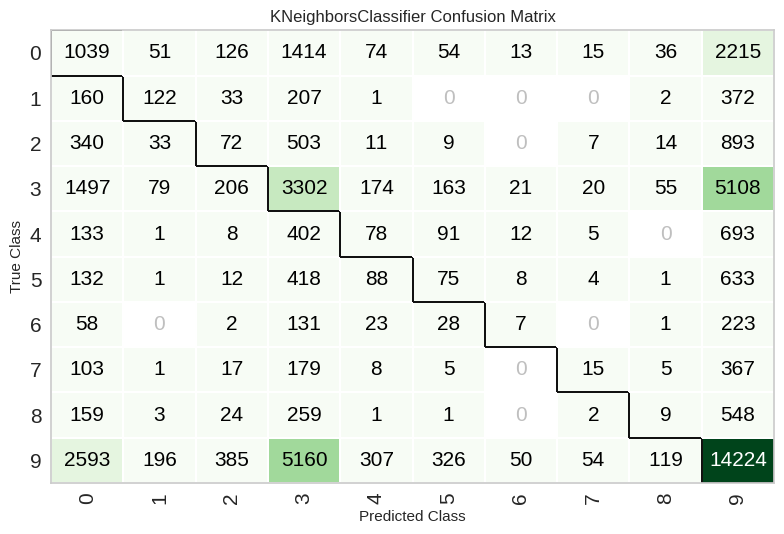

In [6]:
plot_model(knn, plot = 'confusion_matrix')

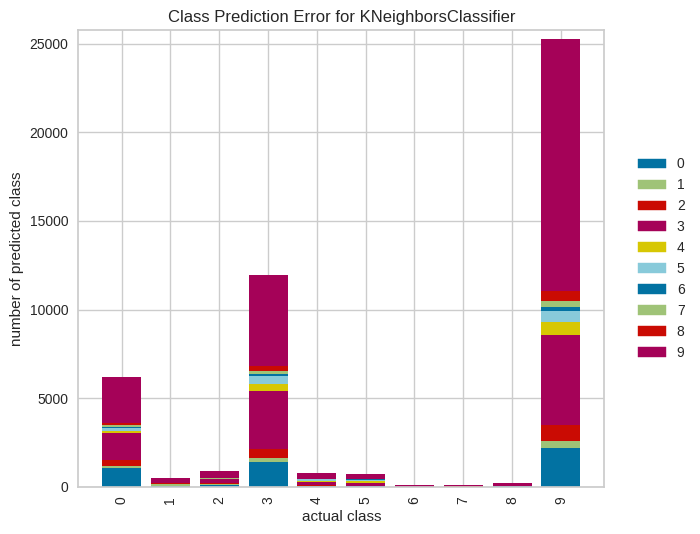

In [7]:
plot_model(knn, plot = 'error')

In [8]:
plot_model(knn, plot = 'parameter')

,Parameters
algorithm,auto
leaf_size,30
metric,minkowski
metric_params,None
n_jobs,-1
n_neighbors,5
p,2
weights,uniform


In [9]:
knn_val_pred = predict_model(knn, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.4035,0.6011,0,0,0,0.0915,0.0919


In [10]:
save_model(knn, 'models_classif/convkb/multiclassif_scores_val/knn')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/res...
                                                               strategy='most_frequent',
                                                               verbose='deprecated'))),
                 ('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
           

# Naive Bayes

In [11]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0965,0.5756,0.0965,0.5909,0.1169,0.0350,0.0717
1,0.0960,0.5786,0.0960,0.5901,0.1163,0.0342,0.0697
2,0.0957,0.5757,0.0957,0.5894,0.1158,0.0344,0.0700
3,0.0983,0.5778,0.0983,0.5940,0.1192,0.0363,0.0733
4,0.0973,0.5766,0.0973,0.5952,0.1179,0.0357,0.0722
5,0.0986,0.5776,0.0986,0.5941,0.1204,0.0368,0.0735
6,0.1032,0.5757,0.1032,0.6005,0.1285,0.0403,0.0810
7,0.0997,0.5765,0.0997,0.6009,0.1226,0.0380,0.0771
8,0.0942,0.5728,0.0942,0.5934,0.1138,0.0340,0.0678


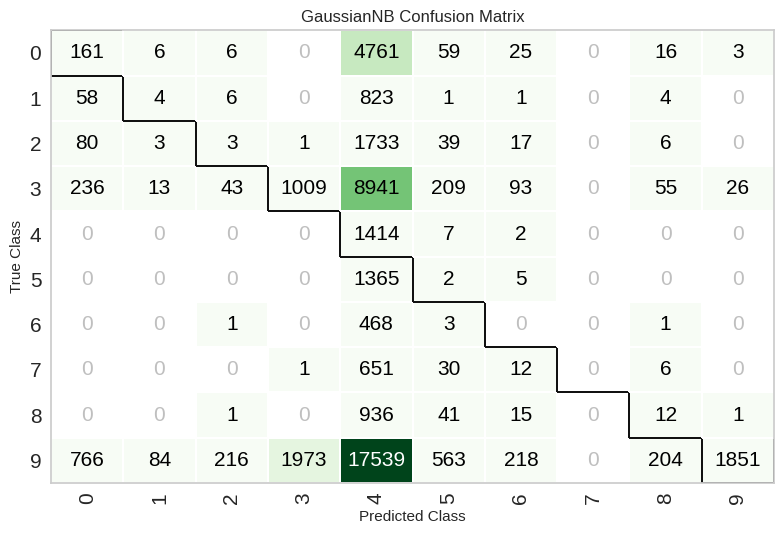

In [12]:
plot_model(nb, plot = 'confusion_matrix')

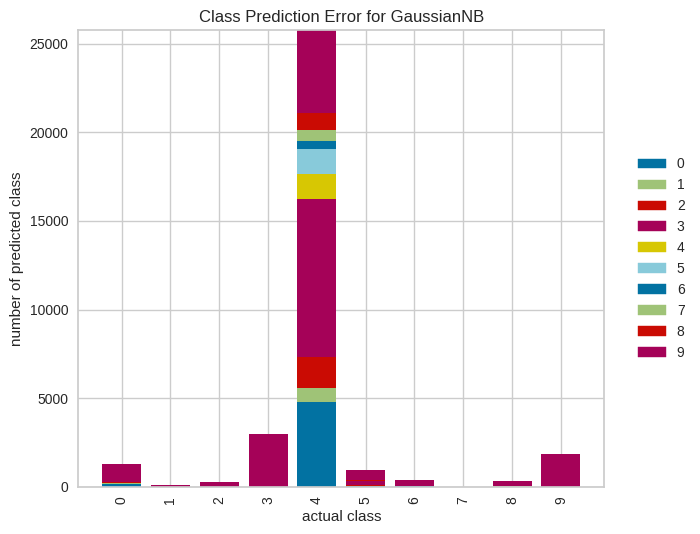

In [13]:
plot_model(nb, plot = 'error')

In [14]:
plot_model(nb, plot = 'parameter')

,Parameters
priors,None
var_smoothing,1e-09


In [15]:
nb_val_pred = predict_model(nb, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.1004,0.5762,0,0,0,0.0376,0.0753


In [16]:
save_model(nb, 'models_classif/convkb/multiclassif_scores_val/nb')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/res...
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missi

# Decision Tree Classifier

In [17]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4837,0.5781,0.4837,0.3609,0.3639,0.0203,0.0328
1,0.4800,0.5767,0.4800,0.3535,0.3603,0.0139,0.0224
2,0.4813,0.5768,0.4813,0.3559,0.3605,0.0153,0.0249
3,0.4811,0.5781,0.4811,0.3586,0.3620,0.0164,0.0264
4,0.4816,0.5772,0.4816,0.3525,0.3608,0.0163,0.0265
5,0.4830,0.5748,0.4830,0.3572,0.3626,0.0193,0.0313
6,0.4827,0.5770,0.4827,0.3617,0.3632,0.0193,0.0311
7,0.4836,0.5767,0.4836,0.3602,0.3623,0.0193,0.0317
8,0.4831,0.5763,0.4831,0.3577,0.3613,0.0174,0.0286


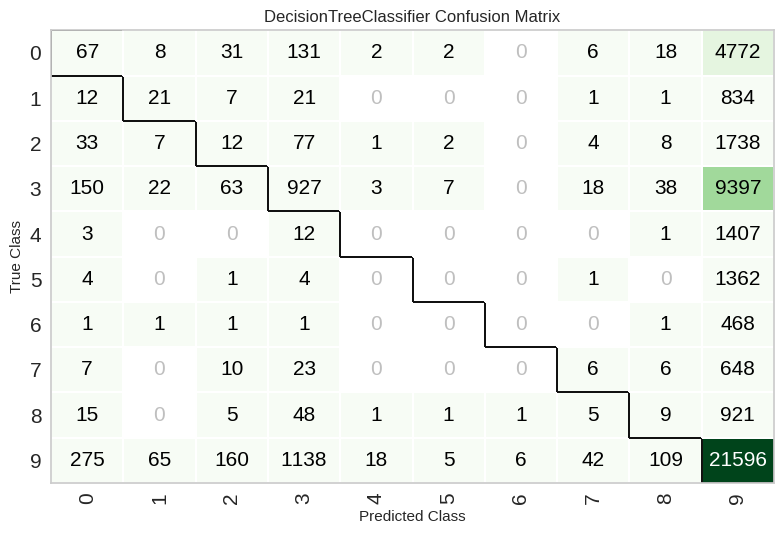

In [18]:
plot_model(dt, plot = 'confusion_matrix')

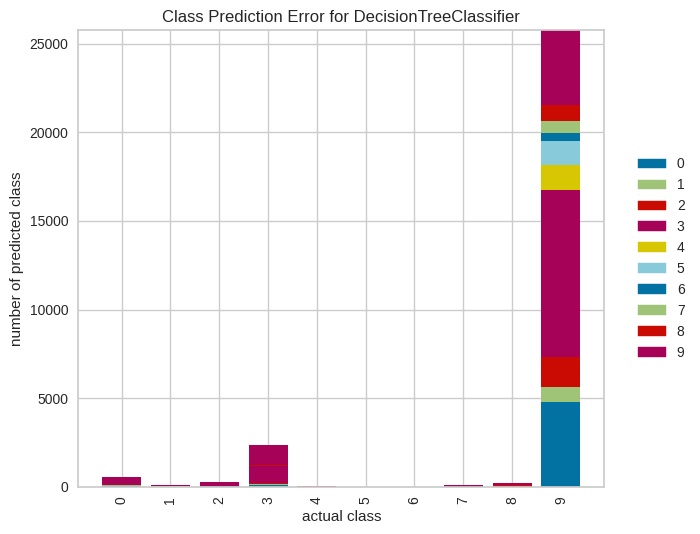

In [19]:
plot_model(dt, plot = 'error')

In [20]:
plot_model(dt, plot = 'parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


In [21]:
dt_val_pred = predict_model(dt, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.4845,0.5767,0,0,0,0.0215,0.0350


In [22]:
save_model(dt, 'models_classif/convkb/multiclassif_scores_val/dt')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/res...
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='gini', max_depth=None,
                                         max_features=None, max_leaf_nodes=None,
                           

# SVM - Linear Kernel

In [23]:
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5029,0.0000,0.5029,0.3987,0.3453,0.0111,0.0488
1,0.5017,0.0000,0.5017,0.3759,0.3487,0.0121,0.0415
2,0.5033,0.0000,0.5033,0.3900,0.3497,0.0145,0.0521
3,0.1197,0.0000,0.1197,0.5551,0.1696,0.0486,0.1023
4,0.1413,0.0000,0.1413,0.5732,0.1798,0.0649,0.0810
5,0.5020,0.0000,0.5020,0.3998,0.3413,0.0073,0.0400
6,0.5030,0.0000,0.5030,0.3972,0.3457,0.0113,0.0488
7,0.1246,0.0000,0.1246,0.5327,0.1812,0.0541,0.0823
8,0.1403,0.0000,0.1403,0.5954,0.1635,0.0461,0.0634


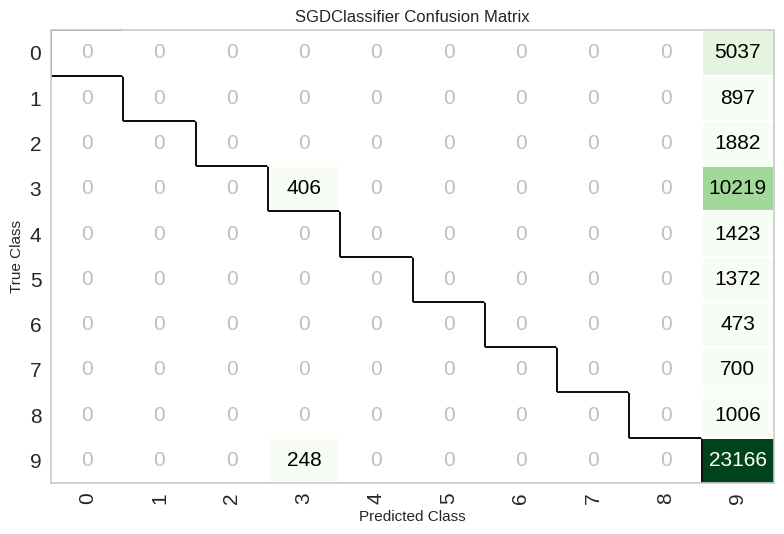

In [24]:
plot_model(svm, plot = 'confusion_matrix')

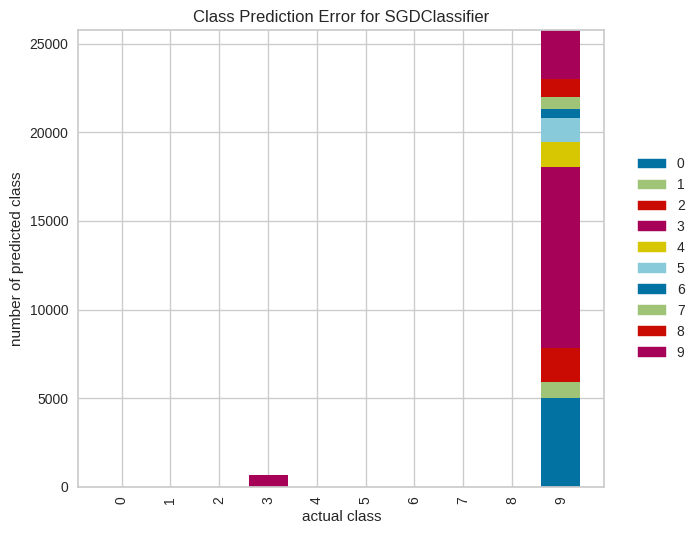

In [25]:
plot_model(svm, plot = 'error')

In [26]:
plot_model(svm, plot = 'parameter')

,Parameters
alpha,0.0001
average,False
class_weight,None
early_stopping,False
epsilon,0.1
eta0,0.001
fit_intercept,True
l1_ratio,0.15
learning_rate,optimal
loss,hinge


In [27]:
svm_val_pred = predict_model(svm, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.5034,0,0,0,0,0.0144,0.0525


In [28]:
save_model(svm, 'models_classif/convkb/multiclassif_scores_val/svm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/res...
                  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                                early_stopping=False, epsilon=0.1, eta0=0.001,
                                fit_intercept=True, l1_ratio=0.15,
                                learning_rate='optimal', loss='hinge',
                                max_iter=1000, n_iter_no_change=5, n_jobs=-1,
                     

# Ridge Classifier

In [29]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5014,0.0000,0.5014,0.4146,0.3379,0.0045,0.0344
1,0.5007,0.0000,0.5007,0.3920,0.3369,0.0031,0.0245
2,0.5009,0.0000,0.5009,0.3939,0.3373,0.0035,0.0262
3,0.5009,0.0000,0.5009,0.3912,0.3376,0.0036,0.0262
4,0.5008,0.0000,0.5008,0.3877,0.3374,0.0034,0.0247
5,0.5009,0.0000,0.5009,0.3920,0.3375,0.0036,0.0262
6,0.5008,0.0000,0.5008,0.3877,0.3374,0.0034,0.0247
7,0.5013,0.0000,0.5013,0.4050,0.3381,0.0045,0.0324
8,0.5008,0.0000,0.5008,0.3898,0.3374,0.0035,0.0254


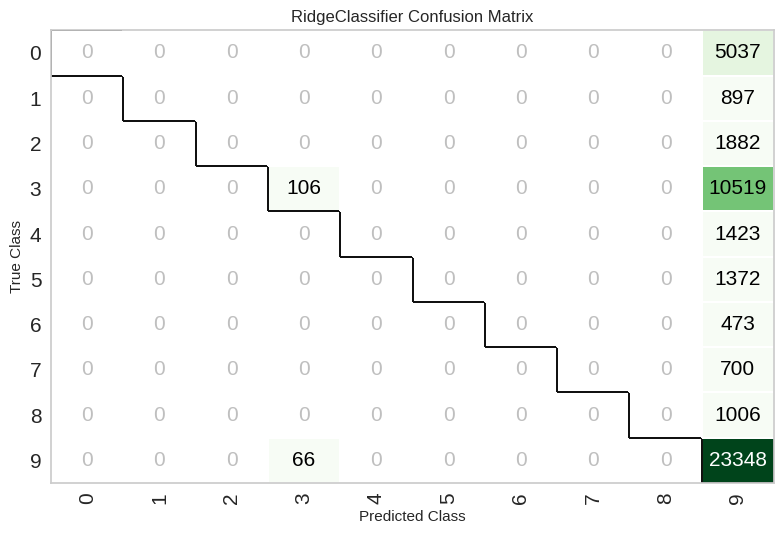

In [30]:
plot_model(ridge, plot = 'confusion_matrix')

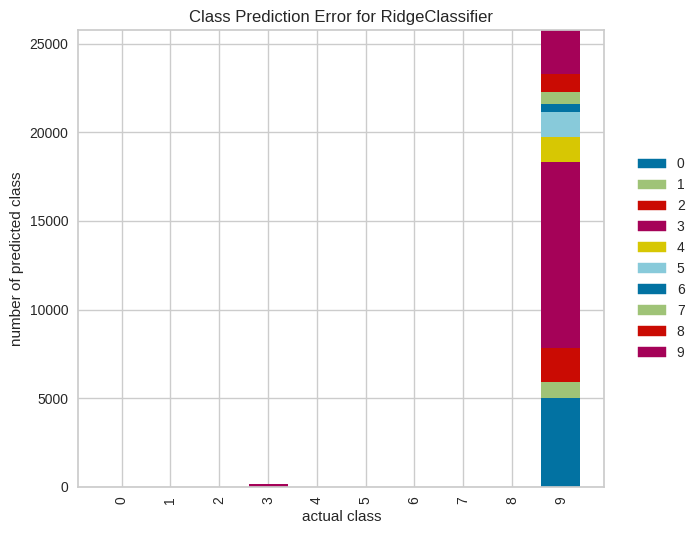

In [31]:
plot_model(ridge, plot = 'error')

In [32]:
plot_model(ridge, plot = 'parameter')

,Parameters
alpha,1.0
class_weight,None
copy_X,True
fit_intercept,True
max_iter,None
positive,False
random_state,5796
solver,auto
tol,0.0001


In [33]:
ridge_val_pred = predict_model(ridge, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.5009,0,0,0,0,0.0039,0.0269


In [34]:
save_model(ridge, 'models_classif/convkb/multiclassif_scores_val/ridge')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/res...
                                                               strategy='most_frequent',
                                                               verbose='deprecated'))),
                 ('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
           

# Random Forest

In [35]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5082,0.6070,0.5082,0.5189,0.3694,0.0347,0.0829
1,0.5064,0.6146,0.5064,0.3870,0.3661,0.0302,0.0737
2,0.5066,0.6092,0.5066,0.4077,0.3660,0.0304,0.0749
3,0.5095,0.6146,0.5095,0.4349,0.3696,0.0361,0.0886
4,0.5074,0.6141,0.5074,0.4162,0.3688,0.0335,0.0792
5,0.5083,0.6118,0.5083,0.3951,0.3677,0.0333,0.0827
6,0.5080,0.6111,0.5080,0.3922,0.3688,0.0340,0.0817
7,0.5070,0.6117,0.5070,0.3995,0.3664,0.0311,0.0766
8,0.5069,0.6101,0.5069,0.4100,0.3653,0.0301,0.0761


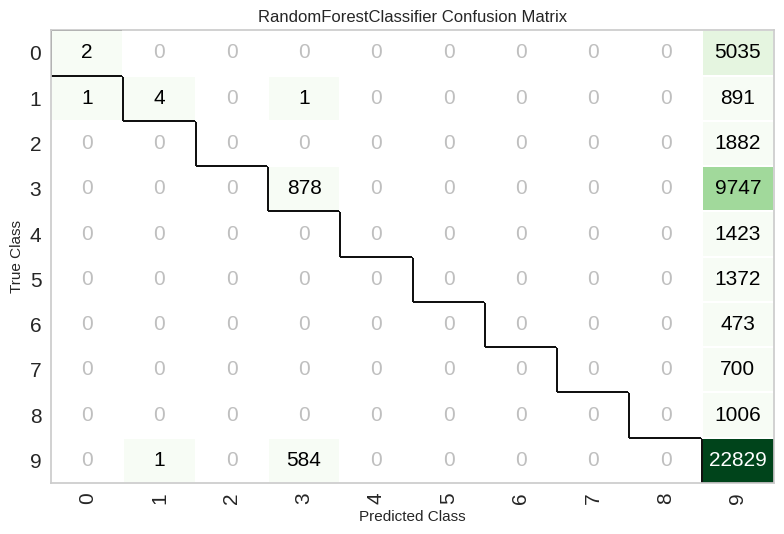

In [36]:
plot_model(rf, plot = 'confusion_matrix')

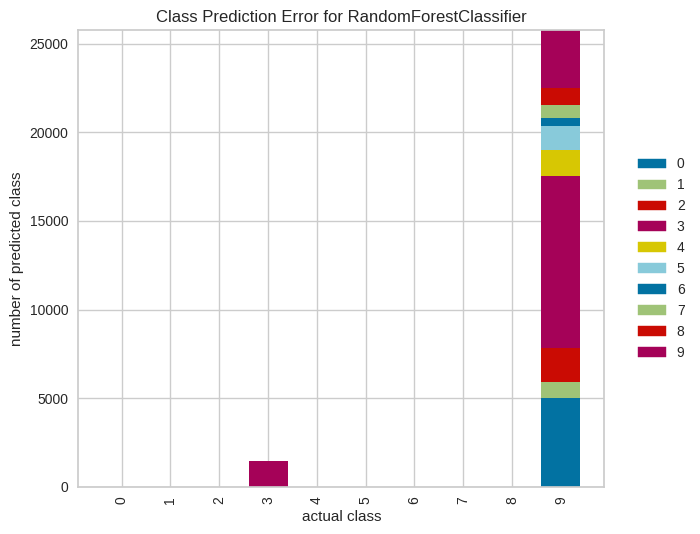

In [37]:
plot_model(rf, plot = 'error')

In [38]:
plot_model(rf, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


In [39]:
rf_val_pred = predict_model(rf, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5080,0.6079,0,0,0,0.0334,0.0819


In [40]:
save_model(rf, 'models_classif/convkb/multiclassif_scores_val/rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/res...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                    

# Quadratic Discriminant Analysis

In [41]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0874,0.5983,0.0874,0.5780,0.1243,0.0311,0.0436
1,0.0900,0.5994,0.0900,0.5810,0.1269,0.0331,0.0482
2,0.0873,0.5992,0.0873,0.5761,0.1242,0.0314,0.0446
3,0.0910,0.6020,0.0910,0.5804,0.1275,0.0336,0.0484
4,0.0909,0.6004,0.0909,0.5792,0.1273,0.0329,0.0468
5,0.0920,0.6019,0.0920,0.5791,0.1292,0.0349,0.0503
6,0.0986,0.6012,0.0986,0.5883,0.1420,0.0393,0.0549
7,0.0912,0.6005,0.0912,0.5866,0.1309,0.0350,0.0505
8,0.0853,0.5989,0.0853,0.5793,0.1214,0.0295,0.0409


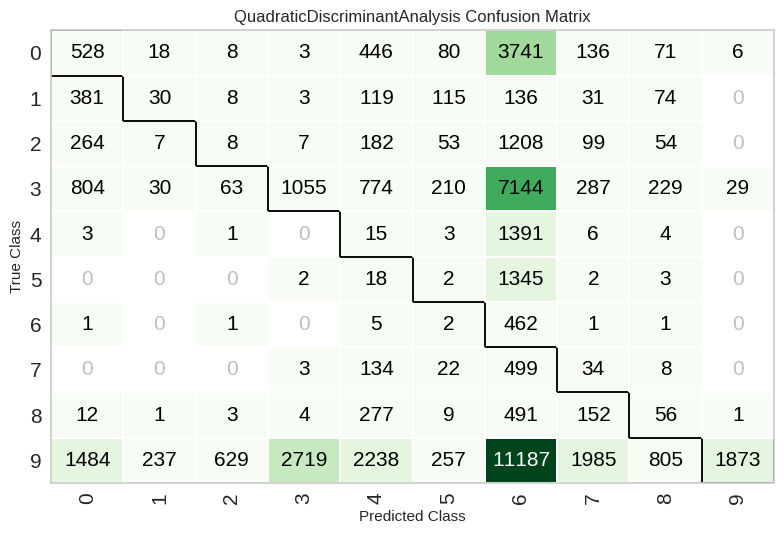

In [42]:
plot_model(qda, plot = 'confusion_matrix')

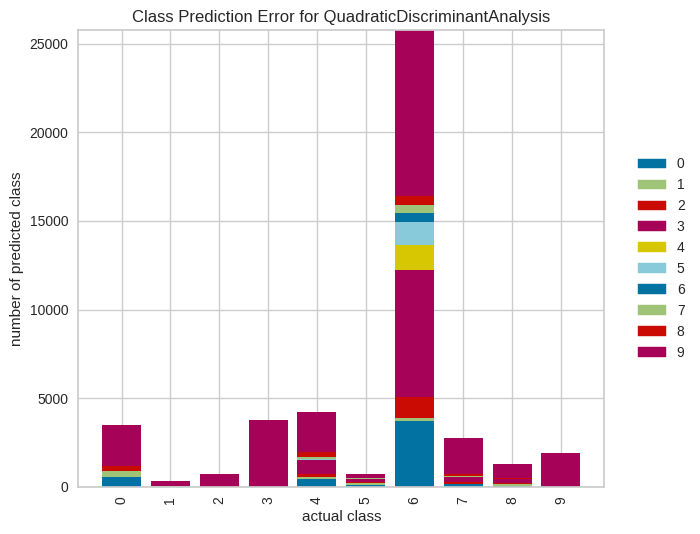

In [43]:
plot_model(qda, plot = 'error')

In [44]:
plot_model(qda, plot = 'parameter')

,Parameters
priors,None
reg_param,0.0
store_covariance,False
tol,0.0001


In [45]:
qda_val_pred = predict_model(qda, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.0906,0.5992,0,0,0,0.0329,0.0469


In [46]:
save_model(qda, 'models_classif/convkb/multiclassif_scores_val/qda')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/res...
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='most_frequent',
                                                               verbose='deprecated'))),
                 ('clean_column_names',
      

# Linear Discriminant Analysis

In [47]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5016,0.5879,0.5016,0.4064,0.3392,0.0055,0.0363
1,0.5006,0.5897,0.5006,0.3825,0.3375,0.0034,0.0234
2,0.5011,0.5897,0.5011,0.3928,0.3384,0.0044,0.0293
3,0.5008,0.5971,0.5008,0.3857,0.3377,0.0036,0.0249
4,0.5007,0.5904,0.5007,0.3795,0.3386,0.0041,0.0250
5,0.5009,0.5912,0.5009,0.3887,0.3381,0.0041,0.0272
6,0.5010,0.5900,0.5010,0.3874,0.3386,0.0044,0.0280
7,0.5010,0.5876,0.5010,0.3895,0.3388,0.0047,0.0294
8,0.5011,0.5910,0.5011,0.3931,0.3385,0.0046,0.0300


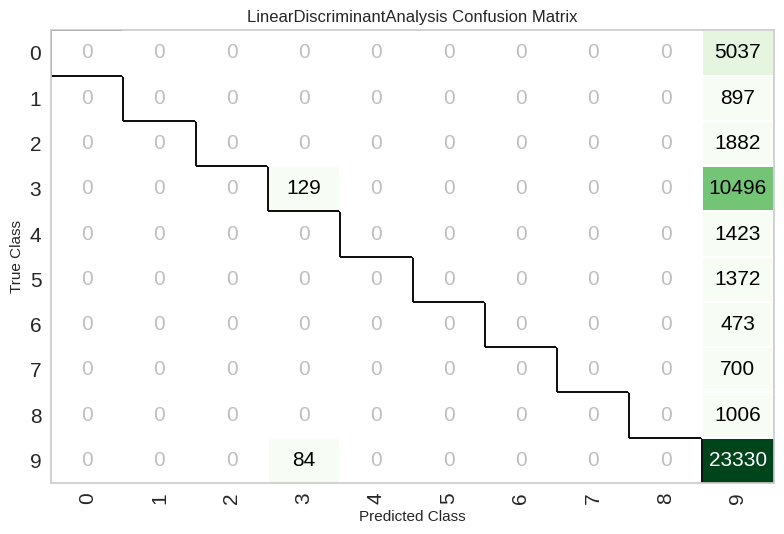

In [48]:
plot_model(lda, plot = 'confusion_matrix')

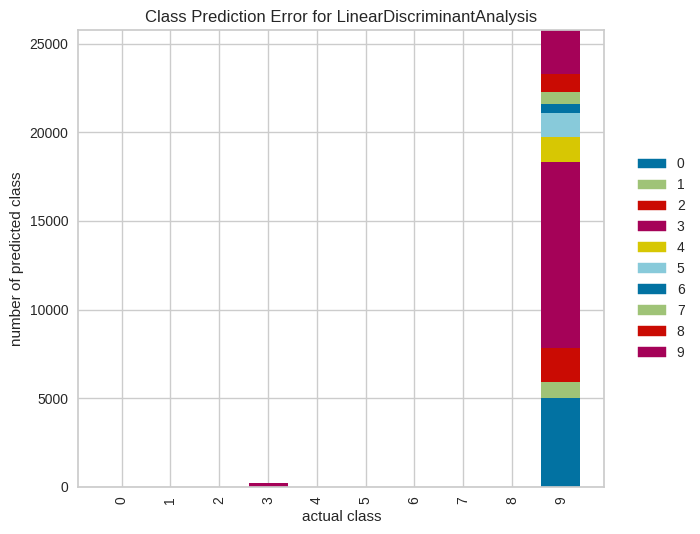

In [49]:
plot_model(lda, plot = 'error')

In [50]:
plot_model(lda, plot = 'parameter')

,Parameters
covariance_estimator,None
n_components,None
priors,None
shrinkage,None
solver,svd
store_covariance,False
tol,0.0001


In [51]:
lda_val_pred = predict_model(lda, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.5010,0,0,0,0,0.0046,0.0291


In [52]:
save_model(lda, 'models_classif/convkb/multiclassif_scores_val/lda')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/res...
                                                               strategy='most_frequent',
                                                               verbose='deprecated'))),
                 ('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
           

# Extra Trees

In [53]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4843,0.6512,0.4843,0.3715,0.3900,0.0615,0.0786
1,0.4845,0.6545,0.4845,0.3737,0.3900,0.0621,0.0797
2,0.4864,0.6593,0.4864,0.3734,0.3905,0.0642,0.0827
3,0.4858,0.6580,0.4858,0.3734,0.3903,0.0628,0.0810
4,0.4881,0.6609,0.4881,0.3767,0.3938,0.0695,0.0887
5,0.4871,0.6583,0.4871,0.3763,0.3924,0.0664,0.0853
6,0.4868,0.6574,0.4868,0.3740,0.3919,0.0669,0.0857
7,0.4863,0.6577,0.4863,0.3741,0.3918,0.0658,0.0842
8,0.4867,0.6566,0.4867,0.3774,0.3917,0.0646,0.0833


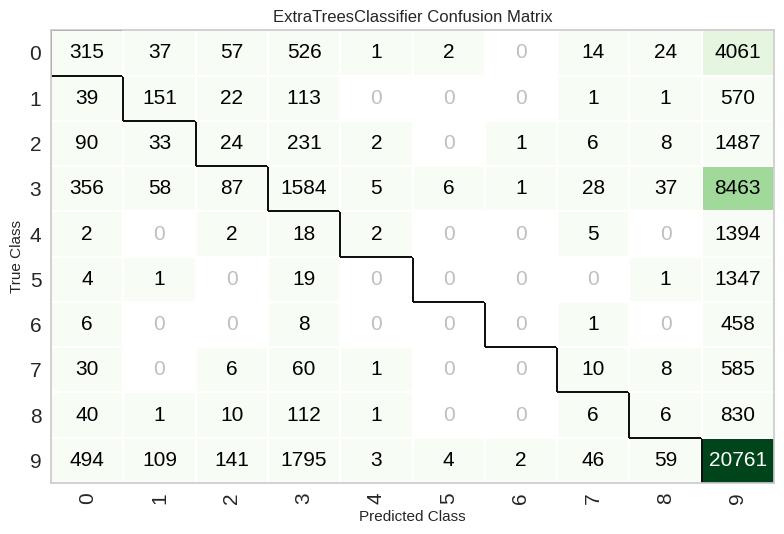

In [54]:
plot_model(et, plot = 'confusion_matrix')

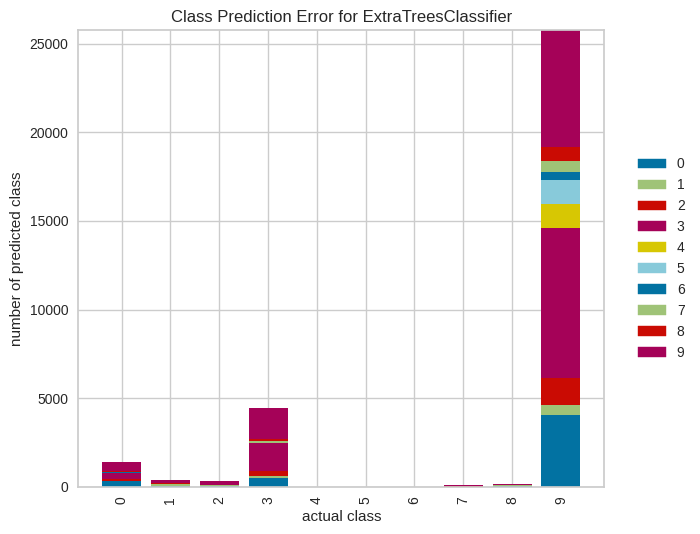

In [55]:
plot_model(et, plot = 'error')

In [56]:
plot_model(et, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


In [57]:
et_val_pred = predict_model(et, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.4914,0.6553,0,0,0,0.0730,0.0946


In [58]:
save_model(et, 'models_classif/convkb/multiclassif_scores_val/et')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/res...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                             

# Light Gradient Boosting Machine

In [59]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5652,0.8057,0.5652,0.5203,0.5194,0.2865,0.2972
1,0.5678,0.8063,0.5678,0.5278,0.5244,0.2949,0.3046
2,0.5684,0.8057,0.5684,0.5320,0.5245,0.2969,0.3064
3,0.5668,0.8053,0.5668,0.5375,0.5216,0.2908,0.3010
4,0.5697,0.8077,0.5697,0.5256,0.5264,0.2982,0.3079
5,0.5708,0.8100,0.5708,0.5312,0.5258,0.2976,0.3079
6,0.5632,0.8041,0.5632,0.5254,0.5183,0.2842,0.2944
7,0.5686,0.8078,0.5686,0.5367,0.5240,0.2944,0.3047
8,0.5679,0.8066,0.5679,0.5306,0.5220,0.2939,0.3039


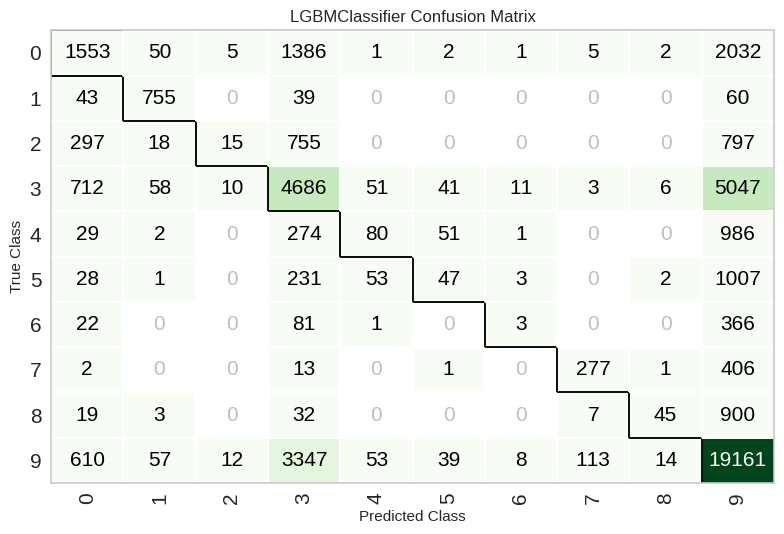

In [60]:
plot_model(lightgbm, plot = 'confusion_matrix')

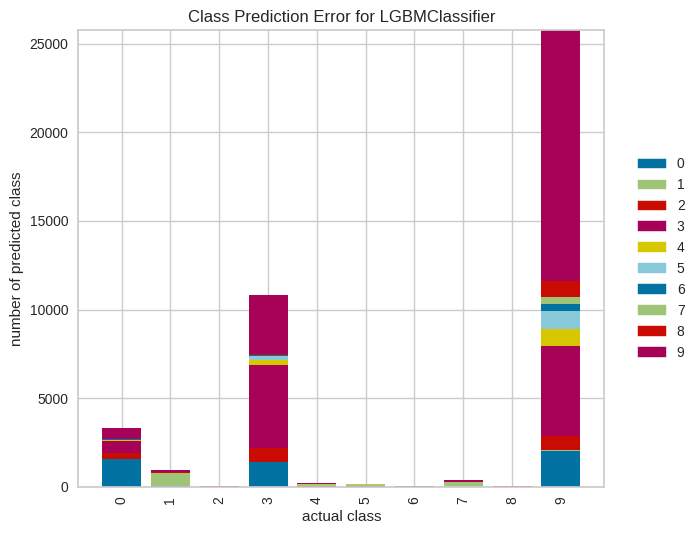

In [61]:
plot_model(lightgbm, plot = 'error')

In [62]:
plot_model(lightgbm, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


In [63]:
lgbm_val_pred = predict_model(lightgbm, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5430,0.7840,0,0,0,0.2430,0.2543


In [64]:
save_model(lightgbm, 'models_classif/convkb/multiclassif_scores_val/lightgbm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/res...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20, min_child_weight=0.001,
                                 min_split_gain=0.0, n_estimators=100, n_jobs=-1,
               

# MLP Classifier

In [65]:
mlp = create_model('mlp')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5064,0.6034,0.5064,0.3892,0.3643,0.0288,0.0733
1,0.5050,0.6209,0.5050,0.3841,0.3622,0.0257,0.0661
2,0.5056,0.6186,0.5056,0.3876,0.3617,0.0258,0.0684
3,0.5070,0.6263,0.5070,0.3924,0.3643,0.0293,0.0758
4,0.5057,0.6034,0.5057,0.3858,0.3642,0.0280,0.0701
5,0.5083,0.6078,0.5083,0.3987,0.3655,0.0316,0.0826
6,0.5074,0.6214,0.5074,0.3941,0.3649,0.0301,0.0780
7,0.5060,0.6019,0.5060,0.3905,0.3617,0.0263,0.0708
8,0.5070,0.6222,0.5070,0.3942,0.3633,0.0285,0.0759


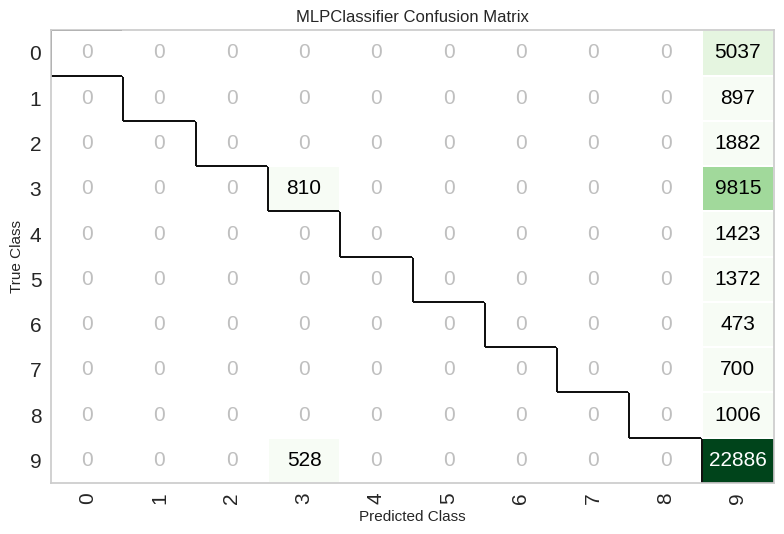

In [66]:
plot_model(mlp, plot = 'confusion_matrix')

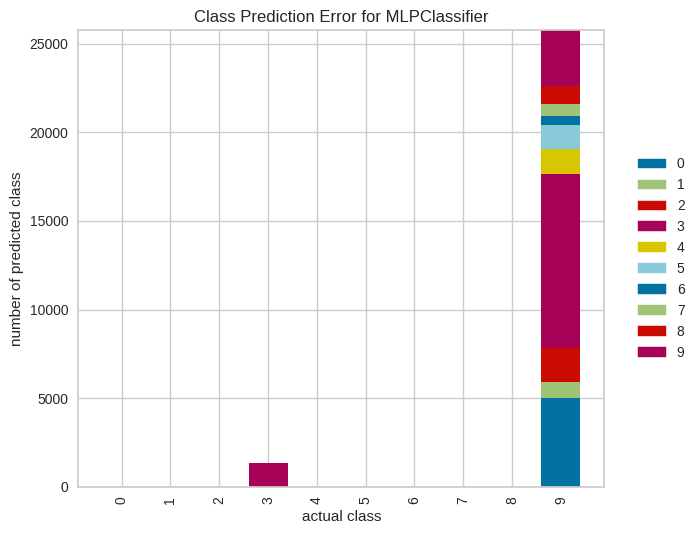

In [67]:
plot_model(mlp, plot = 'error')

In [68]:
plot_model(mlp, plot = 'parameter')

,Parameters
activation,relu
alpha,0.0001
batch_size,auto
beta_1,0.9
beta_2,0.999
early_stopping,False
epsilon,1e-08
hidden_layer_sizes,"(100,)"
learning_rate,constant
learning_rate_init,0.001


In [69]:
mlp_val_pred = predict_model(mlp, data=val)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,MLP Classifier,0.5068,0,0,0,0,0.0290,0.0753


In [70]:
save_model(mlp, 'models_classif/convkb/multiclassif_scores_val/mlp')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['http://semanticscience.org/resource/SIO_000281',
                                              'http://semanticscience.org/resource/SIO_000628',
                                              'http://semanticscience.org/res...
                                batch_size='auto', beta_1=0.9, beta_2=0.999,
                                early_stopping=False, epsilon=1e-08,
                                hidden_layer_sizes=(100,),
                                learning_rate='constant',
                                learning_rate_init=0.001, max_fun=15000,
                                max_iter=500, momentum=0.9, 